In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
titanic_train = pd.read_csv("./data/titanic_train.csv")

In [76]:
titanic_train.info()
# Age, Cabin,Embarked에서  null값이 보인다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
titanic_train.isnull().sum()
# Age 결측치 177개 (20%에 해당하는 수치)
# Cabin 결측치 687개 (77%에 해당하는 수치)
# Embarked 결측치 2개(레코드만 삭제하는 것이 타당할 것 같다.)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
# PassengerId는 삭제해주도록하자.
titanic_train.drop("PassengerId",axis=1,inplace=True)

In [79]:
titanic_train
# PassengerId 칼럼 삭제 확인

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
titanic_train["Survived"].value_counts() # 0과 1중 Survived가 뭔지 알수 있는 방법이 있을까?
# 근데 이게 애초에 수치형을 받아들여진건데 그게 될까?
# 캐글 확인) 1은 생존, 0은 사망 

0    549
1    342
Name: Survived, dtype: int64

In [81]:
titanic_train["Pclass"].value_counts()
# Plcass는 범주화가 필요하다. OneHotEncoding을 해주도록 한다.

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [82]:
titanic_train["Pclass"].astype("str")
# int형을 str로 바꿔주고

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

In [83]:
# OneHotEncoding
Pclass_dummies = pd.get_dummies(titanic_train["Pclass"])

In [84]:
# 칼럼명을 적어준다
Pclass_dummies.columns=["Class1","Class2","Class3"]

In [85]:
# Pclass 원핫인코딩 
titanic_train = pd.concat([titanic_train, Pclass_dummies],axis=1)

In [86]:
# Pclass는 삭제해주도록한다.
titanic_train.drop("Pclass", axis=1, inplace=True)

In [87]:
titanic_train

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class1,Class2,Class3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [88]:
# Sex의 경우 라벨인코딩
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(titanic_train["Sex"])
titanic_train["Sex"]=label_encoder.transform(titanic_train["Sex"])

In [90]:
titanic_train.head(3)
# Sex의 LabelEncodeing 확인

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class1,Class2,Class3
0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1


In [106]:
# Age 확인
titanic_train["Age"].isnull().sum()
# Age 칼럼 자체를 삭제 (X)
# Age 결측 레코드만 삭제 (# 결측치 확인 결측치가 177이면 약 20%에 해당하는 양이다. 삭제하면 안될 것 같은데)
# Age 평균으로 대체
# 다른 칼럼을 이용하여 대체

177

In [92]:
titanic_train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [96]:
titanic_train["Age_level"]=titanic_train["Age"]
# Age를 구간별로 나누어보자
# ~18 : minor
# 18~59 : grownup
# 69~ : elder
for i in range(0,891):
    if titanic_train["Age_level"][i]<18:
        titanic_train["Age_level"][i]="minor"
    elif titanic_train["Age_level"][i]<59:
        titanic_train["Age_level"][i]="grownups"
    else:
        titanic_train["Age_level"][i]="elder"
        
    

/var/folders/zz/lwjzp_r130b4y7w9qcwwkfhr0000gn/T/ipykernel_3532/1390047253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train["Age_level"][i]="grownups"
/Users/heejinkim/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [97]:
titanic_train["Age_level"]

0      grownups
1      grownups
2      grownups
3      grownups
4      grownups
         ...   
886    grownups
887    grownups
888       elder
889    grownups
890    grownups
Name: Age_level, Length: 891, dtype: object

In [98]:
# 나이 구간별 생존율
minor=titanic_train[titanic_train["Age_level"]=="minor"] # 0.5398230088495575
grownups=titanic_train[titanic_train["Age_level"]=="grownups"] # 0.387434554973822
elder=titanic_train[titanic_train["Age_level"]=="elder"] # 0.28780487804878047

**minor(미성년)의 경우에는 elder(노인)보다 생존율이 2배 이상 높았다. Age 칼럼을 함부로 지우면 안될 것 같다.**

In [99]:
len(minor[minor["Survived"]==1])/len(minor)

0.5398230088495575

In [100]:
len(grownups[grownups["Survived"]==1])/len(grownups)

0.387434554973822

In [101]:
len(elder[elder["Survived"]==1])/len(elder)

0.28780487804878047

**나이 구간별 생존율에 차이가 있다고 할 수 있을까?**

In [104]:
# 생존자의 평균연령과 사망자의 평균연령을 비교해보자.
# 생존자의 평균연령
titanic_train[titanic_train["Survived"]==1]["Age"].mean() # 28.343689655172415

# 사망자의 평균연령
titanic_train[titanic_train["Survived"]==0]["Age"].mean() # 30.62617924528302

# 생존자의 평균연령와 사망자의 평균연령이 별로 차이가 없는 것 같다

30.62617924528302

In [107]:
# 다른 방법이 생각나질 않아서 Age는 평균으로 대체 하도록 하겠다.

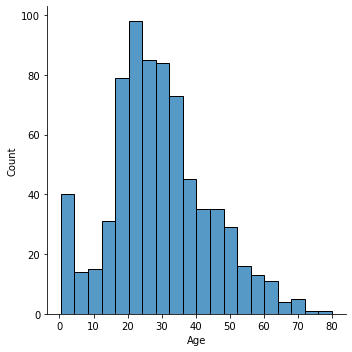

In [124]:
# 결측치를 대체하기 전 titanic_train['Age'] 히스토그램 분포
sns.displot(titanic_train['Age'],bins=20)
plt.show()

**결측치를 대체하고 난 후에 그려진 Age 히스토그램도 위와 비슷하게 그려져야만 한다 // 결측치를 자동으로 대체 해주었을 가능성**

**(1) '0' 으로 대체**

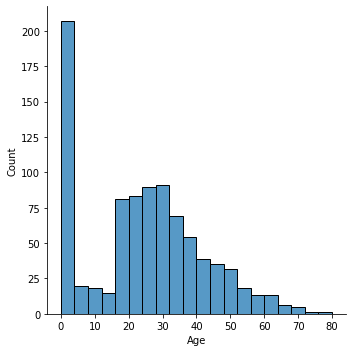

In [123]:
sns.displot(titanic_train.fillna(0)['Age'],bins=20)
plt.show()

**'0'으로 대체하는데 0을 제외한 다른 구간의 분포 모양은 왜 변한 것인지 알 수 없는 일이다. '0'이 포함되는 구간만 빈도가 높아지고, 나머지 구간은 원래 히스토그램과 똑같은 분포여야하는게 아닐까?**